In [1]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("student_data.csv")
pd.options.display.max_columns = 50

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

I removed the columns that were not contributing much to grade prediction.

In [5]:
df = df.drop(columns=['school', 'Mjob', 'Fjob', 'Dalc', 'Walc', 'nursery',
                      "guardian","famsize","address","reason","Pstatus","romantic"],axis=1)


I calculated the final grade by taking the average of G1, G2, and G3.

In [6]:
df['grade'] = (df['G1'] + df['G2'] + df['G3']) / 3


In [7]:
df["schoolsup"].value_counts()
df["famsup"].value_counts()


famsup
yes    242
no     153
Name: count, dtype: int64

I converted categorical columns into numeric values using OneHotEncoding.

In [8]:
from sklearn.preprocessing import OneHotEncoder
cols = ["sex","schoolsup","famsup","paid","activities","higher","internet"]

df = pd.get_dummies(df, columns=cols, drop_first=True).astype(int)


I created a heatmap to understand which features have strong relationships with the student’s final grade.

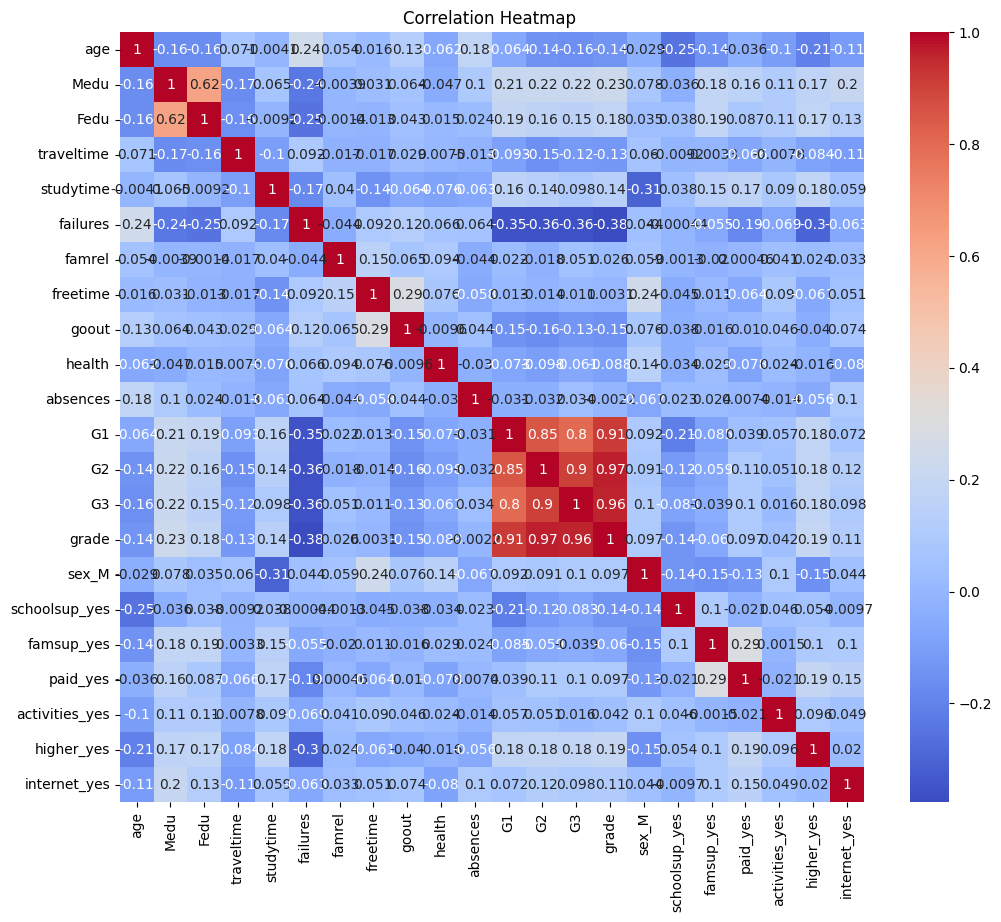

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap ")
plt.show()


In [10]:
X = df.drop(["grade"],axis=1)
y = df['grade']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [12]:
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(X_train,y_train)
y_pred = xg_model.predict(X_test)


I used XGBoost, a powerful gradient boosting algorithm, to predict student grades.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.21079768240451813
R2 Score: 0.9855661392211914


MSE: Shows how far predictions are from actual grades

R2 score: Shows how well the model explains the variation

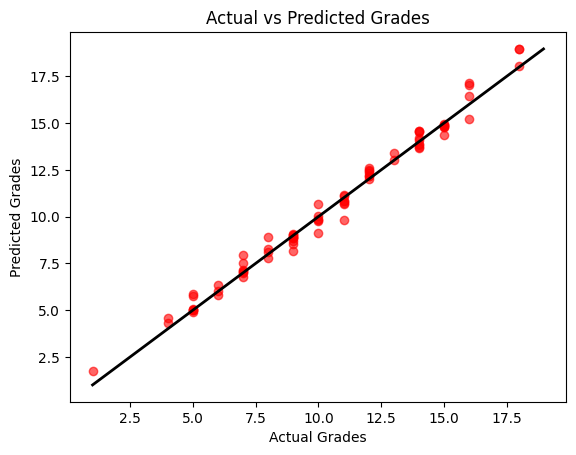

In [14]:
plt.scatter(y_test, y_pred, color='red', alpha=0.6)

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linewidth=2)

plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()


I plotted a scatter graph to compare actual grades vs predicted grades.

In [15]:
import joblib
joblib.dump(xg_model, 'student_grade_predictor.pkl')


['student_grade_predictor.pkl']

This project predicts student final grades using machine learning. I cleaned the dataset, engineered features, performed one-hot encoding, and trained an XGBoost Regression model. The model achieved strong accuracy and was saved as a .pkl file for deployment.